In [7]:
import quandl

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
quandl.ApiConfig.api_key="SpDjVhR57VT6-rpNHnxa"

In [12]:
df= quandl.get("EOD/AAPL")

In [13]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [19]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/(df['Adj_Close']*100)
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/(df['Adj_Open']*100)

In [20]:
df.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,0.000271,-0.000092
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,0.000120,-0.000017
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,0.000142,-0.000100
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,0.000189,-0.000004
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.000088,0.000023


In [21]:
import seaborn as sns

In [22]:
corr=df.corr()

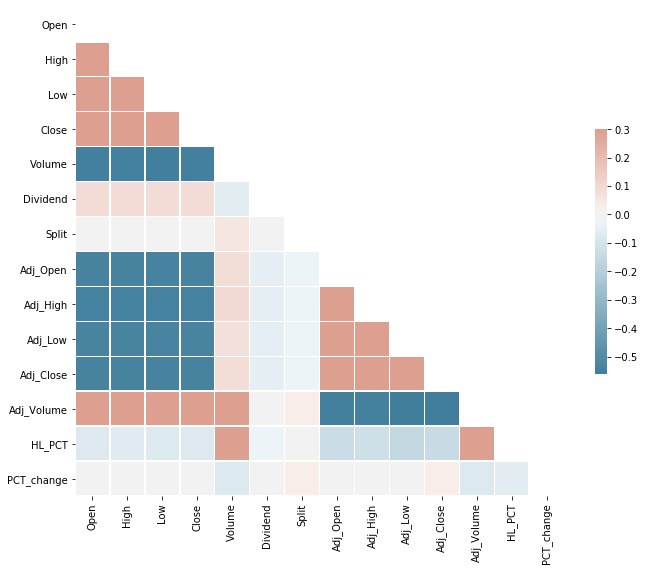

In [24]:
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0, square=True,linewidths=0.5, cbar_kws={'shrink':.5})

In [25]:
df=df[['Adj_Close','Adj_Volume','HL_PCT','PCT_change']]

In [26]:
df.shape

(1090, 4)

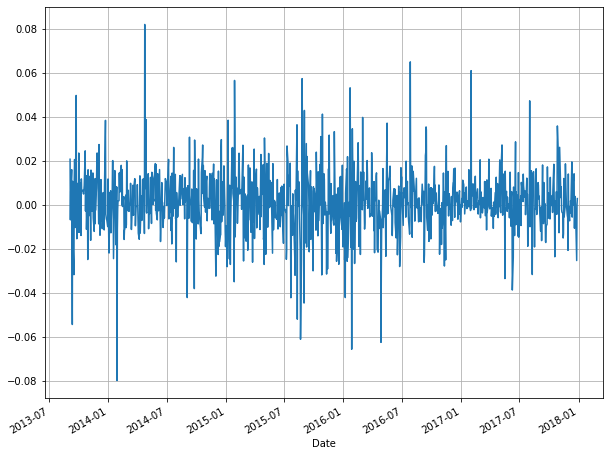

In [27]:
df['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

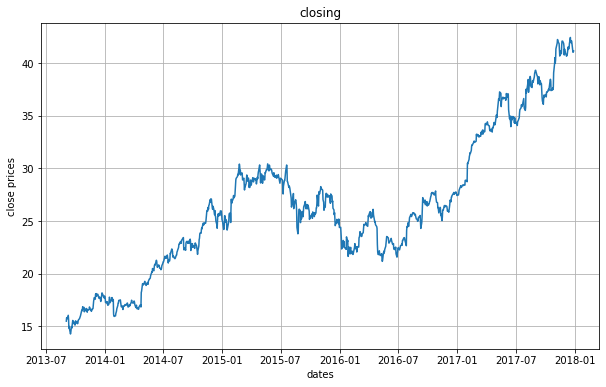

In [28]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df['Adj_Close'])
plt.xlabel("dates")
plt.ylabel("close prices")
plt.title("closing")
plt.show()

In [29]:
df.corr()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Close,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.137288,0.512480,1.000000,-0.060349
PCT_change,0.025237,-0.079556,-0.060349,1.000000


In [39]:
label = df["Adj_Close"].shift(-2) 

#creating new column called Label with the last 10 rows as nan

print("Label having total null: ",label.isna().sum()) 
print("Shape of label: ", label.shape, "this includes null") 
print( df["Adj_Close"]) 
print (label)
label.dropna(inplace=True) 
y=np.array(label)
print("Shape of y after droppin null: ",y.shape)
X = (df[["Adj_Volume","HL_PCT", "PCT_change" ]])
print("Shape of x dataset:" ,X.shape)
X_lately=X[-10:]
X=X[:-10]
print("Shape of X after removing X lately: ",X.shape) 
print("Shape of X_lately: ",X_lately.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41) 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train = norm. transform(X_train)
X_test = norm. transform(X_test) 
X_lately=norm. transform(X_lately)

Label having total null:  2
Shape of label:  (1090,) this includes null
Date
2013-09-03    15.476472
2013-09-04    15.796753
2013-09-05    15.688388
2013-09-06    15.781833
2013-09-09    16.033661
                ...    
2017-12-21    42.101646
2017-12-22    42.101646
2017-12-26    41.033528
2017-12-27    41.040745
2017-12-28    41.156217
Name: Adj_Close, Length: 1090, dtype: float64
Date
2013-09-03    15.688388
2013-09-04    15.781833
2013-09-05    16.033661
2013-09-06    15.668432
2013-09-09    14.815385
                ...    
2017-12-21    41.033528
2017-12-22    41.040745
2017-12-26    41.156217
2017-12-27          NaN
2017-12-28          NaN
Name: Adj_Close, Length: 1090, dtype: float64
Shape of y after droppin null:  (1088,)
Shape of x dataset: (1090, 3)
Shape of X after removing X lately:  (1080, 3)
Shape of X_lately:  (10, 3)


ValueError: Found input variables with inconsistent numbers of samples: [1080, 1088]

In [40]:
reg = LinearRegression() 
reg.fit(X_train,y_train) 
score=reg.score(X_test,y_test)
print("Estimated Intercept Coefficient:", reg.intercept_) 
print("Number of coefficients",len(reg.coef_))

NameError: name 'X_train' is not defined

In [41]:
coefdf=pd.DataFrame(zip(X.columns,reg.coef_),columns=['features','estimated Coefficients']) 
coefdf

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [42]:
forcast=[]
forecast=reg.predict(X_lately)
y_pred= reg.predict(X_test)
mse- mean_squared_error(y_test,y_pred) 
print("MSE: ", mse) 
print("LinearReg Score: ", score) 
print(forecast)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.